# LAB 1: MỐI QUAN HỆ CỦA DỮ LIỆU

In [ ]:
!wget -qO- https://drive.google.com/uc?id=1-1u3Ky_-XmKSs0nLLrYwspP39bikS1DW >> covid_data.zip
!unzip -o covid_data.zip

Archive:  covid_data.zip
  inflating: covid_data/Mission_report_2021_04_10.csv  
  inflating: covid_data/Mission_report_2021_04_09.csv  
  inflating: covid_data/Mission_report_2021_04_08.csv  
  inflating: covid_data/Mission_report_2021_04_12.csv  
  inflating: covid_data/Mission_report_2021_04_11.csv  
  inflating: covid_data/Mission_report_2021_04_13.csv  
  inflating: covid_data/Mission_report_2021_04_14.csv  
  inflating: covid_data/Mission_report_2021_04_15.csv  
  inflating: covid_data/Mission_report_2021_04_16.csv  
  inflating: covid_data/Mission_report_2021_04_17.csv  
  inflating: covid_data/Mission_report_2021_04_18.csv  
  inflating: covid_data/Mission_report_2021_04_19.csv  
  inflating: covid_data/Mission_report_2021_04_20.csv  
  inflating: covid_data/Mission_report_2021_04_21.csv  
  inflating: covid_data/Mission_report_2021_04_22.csv  
  inflating: covid_data/Mission_report_2021_04_23.csv  
  inflating: covid_data/Mission_report_2021_04_24.csv  
  inflating: covid_data

In [ ]:
%ls

covid_data/  covid_data.zip  sample_data/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import plotly.express as px
from sklearn.manifold import TSNE

In [ ]:
data_df = pd.read_csv('covid_data/Mission_report_2021_04_12.csv')

In [ ]:
data_df.head()

,time_data,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,2021-04-12,NaN,World,"137,249,433","+588,257","2,958,324","+8,803","110,435,834","+550,678","23,855,275","103,910","17,608",379.5,NaN,NaN,NaN,All,NaN,NaN,NaN
1,2021-04-12,1.0,China,"90,426",+16,"4,636",NaN,"85,495",+7,295,3,63,3,"160,000,000","111,163","1,439,323,776",Asia,"15,917","310,467",9
2,2021-04-12,2.0,USA,"31,990,143","+56,522","576,298",+460,"24,560,856","+79,140","6,852,989","9,321","96,206","1,733","420,822,699","1,265,571","332,516,170",North America,10,577,1
3,2021-04-12,3.0,India,"13,686,073","+160,694","171,089",+880,"12,250,440","+96,727","1,264,544","8,944","9,842",123,"257,806,986","185,397","1,390,568,032",Asia,102,"8,128",5
4,2021-04-12,4.0,Brazil,"13,521,409","+38,866","355,031","+1,738","11,957,068","+76,265","1,209,310","8,318","63,262","1,661","28,600,000","133,809","213,737,070",South America,16,602,7


In [ ]:
data_df.shape

(222, 20)

In [ ]:
data_df.dtypes

time_data              object
#                     float64
Country,Other          object
TotalCases             object
NewCases               object
TotalDeaths            object
NewDeaths              object
TotalRecovered         object
NewRecovered           object
ActiveCases            object
Serious,Critical       object
Tot Cases/1M pop       object
Deaths/1M pop          object
TotalTests             object
Tests/\n1M pop\n       object
Population             object
Continent              object
1 Caseevery X ppl      object
1 Deathevery X ppl     object
1 Testevery X ppl      object
dtype: object

In [ ]:
cols = data_df.columns.drop(['time_data','#','Country,Other','Continent'])
data_df[cols] = data_df[cols].apply(lambda x: x.str.replace(',', ''))
data_df[cols] = data_df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
data_df.head()

,time_data,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,2021-04-12,NaN,World,137249433,588257.0,2958324.0,8803.0,110435834.0,550678.0,23855275.0,103910.0,17608.0,379.5,NaN,NaN,NaN,All,NaN,NaN,NaN
1,2021-04-12,1.0,China,90426,16.0,4636.0,NaN,85495.0,7.0,295.0,3.0,63.0,3.0,160000000.0,111163.0,1.439324e+09,Asia,15917.0,310467.0,9.0
2,2021-04-12,2.0,USA,31990143,56522.0,576298.0,460.0,24560856.0,79140.0,6852989.0,9321.0,96206.0,1733.0,420822699.0,1265571.0,3.325162e+08,North America,10.0,577.0,1.0
3,2021-04-12,3.0,India,13686073,160694.0,171089.0,880.0,12250440.0,96727.0,1264544.0,8944.0,9842.0,123.0,257806986.0,185397.0,1.390568e+09,Asia,102.0,8128.0,5.0
4,2021-04-12,4.0,Brazil,13521409,38866.0,355031.0,1738.0,11957068.0,76265.0,1209310.0,8318.0,63262.0,1661.0,28600000.0,133809.0,2.137371e+08,South America,16.0,602.0,7.0


In [ ]:
del data_df['#']
data_df=data_df[1:]

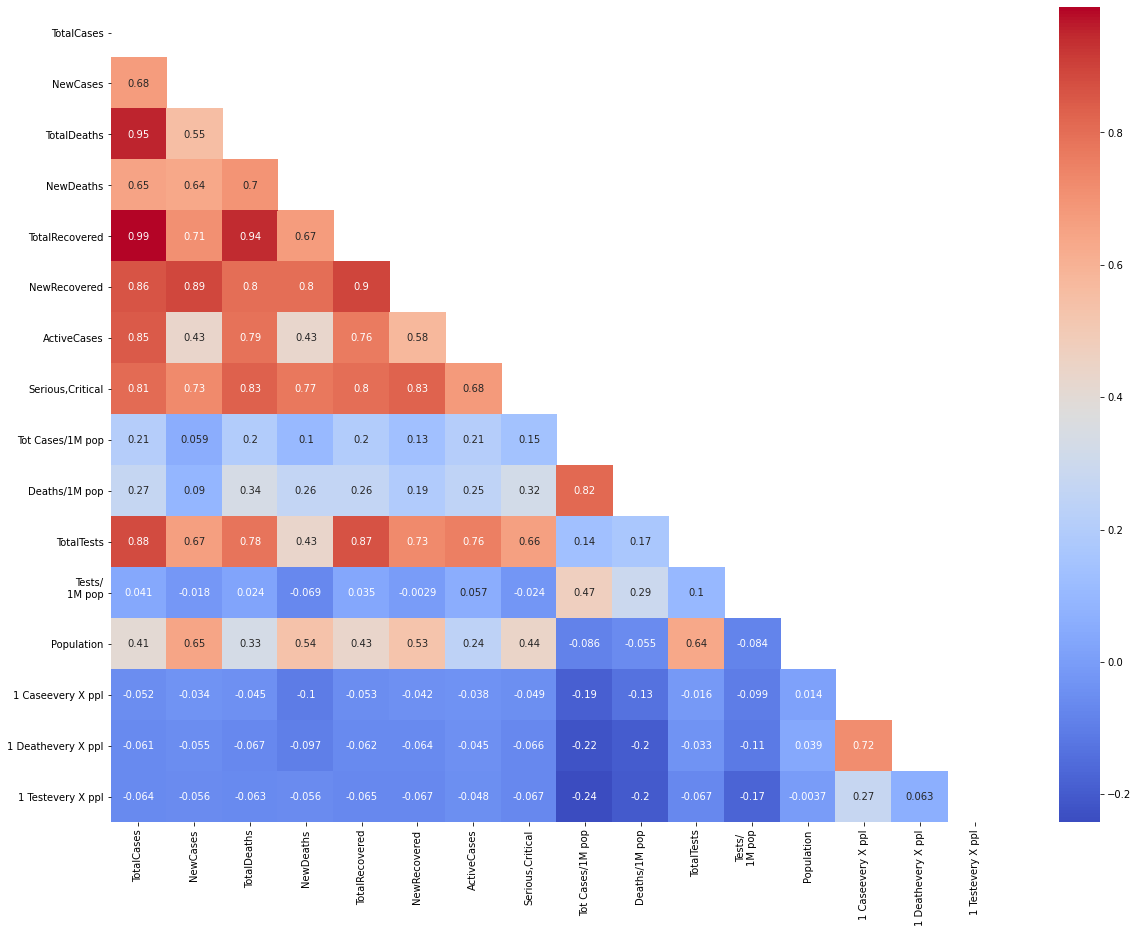

In [ ]:
mask = np.triu(np.ones_like(data_df.corr()))
plt.subplots(figsize=(20,15))
dataplot = sns.heatmap(data_df.corr(), cmap="coolwarm", annot=True, mask=mask)

## TotalCases

### TotalCases

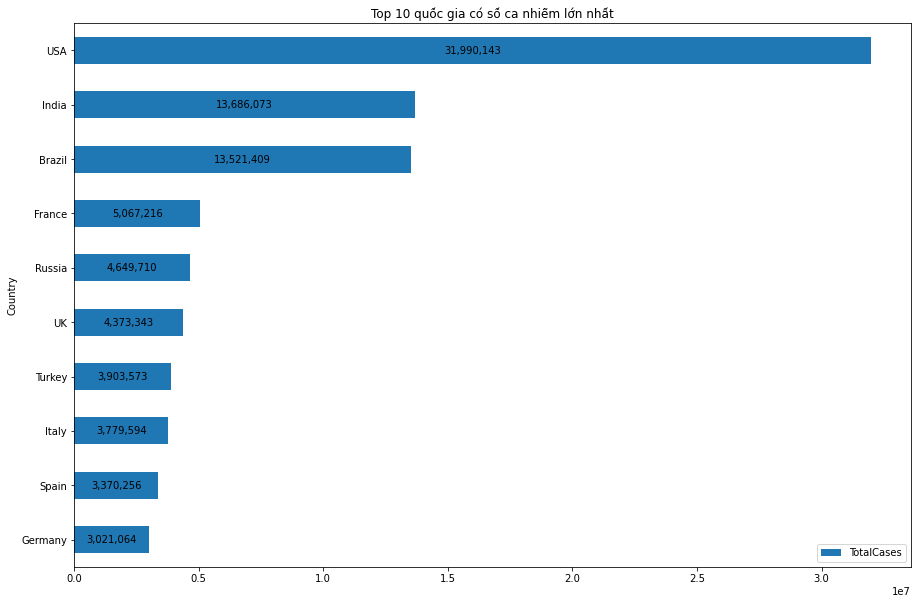

In [ ]:
top10_totalcases = data_df.sort_values('TotalCases').tail(10)
ax = top10_totalcases.plot(kind='barh',x='Country,Other',y='TotalCases', figsize=(15,10))
plt.ylabel('Country')
plt.title('Top 10 quốc gia có số ca nhiễm lớn nhất')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds  
    ax.annotate(format(int(width), ','), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')   
plt.show()

####**Nhận xét**
- Biểu đồ trên cho ta cái nhìn tổng quan về tình hình dịch bệnh nổi bật đã diễn ra tại các nước từ khi bùng phát dịch thông qua tổng số ca nhiễm.
- Sử dụng biểu đồ bar chart dạng nằm ngang giúp so sánh tổng số ca nhiễm ở các đất nước khác nhau.
- Nhìn vào biểu đồ, tính đến ngày 9/4/2021 ta thấy nước Mỹ vẫn có số ca nhiễm lớn nhất trên thế giới và gấp hơn 2 lần so với nước có số ca nhiễm nhiều thứ hai.

### TotalCases vs TotalDeaths

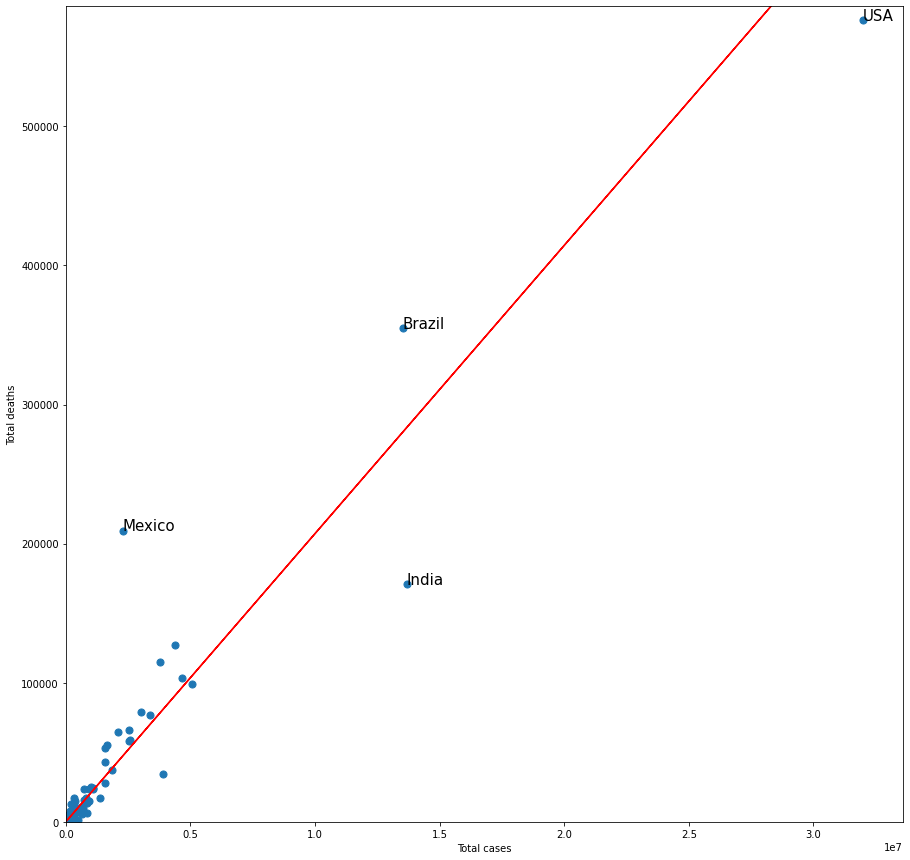

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

ax.scatter(x=data_df['TotalCases'],y=data_df['TotalDeaths'], s=50.0)
ax.set_xlabel('Total cases')
ax.set_ylabel('Total deaths')

x = data_df['TotalCases'] 
a = (data_df['TotalDeaths']/data_df['TotalCases']).mean()
y = x * a

for idx, row in data_df.iterrows():
  if abs((a * row['TotalCases'] - row['TotalDeaths'])) / (math.sqrt(a * a + 1)) > 50000:
    ax.annotate(row['Country,Other'], xy=(row['TotalCases'], row['TotalDeaths']), size=15)

plt.plot(x,y,'r')
plt.ylim(0,max(data_df['TotalDeaths']+10000))
plt.xlim(0)
plt.show()

####**Nhận xét**
- Đường màu đỏ thể hiện mức độ tử vong trung bình so với tổng ca nhiễm của các nước trên thế giới. 
- Các đất nước nằm phía dưới đường màu đỏ có hệ thống y tế tốt khi có tỉ lệ tử vong so với số ca nhiễm thấp hơn mức trung bình của thế giới.
-> Vì vậy, những nước khác cần học hỏi hay áp dụng những biện pháp y tế, cách phòng chống dịch covid19  và chữa trị cho người dân nước mình để giảm số ca tử vong xuống thấp nhất có thể.

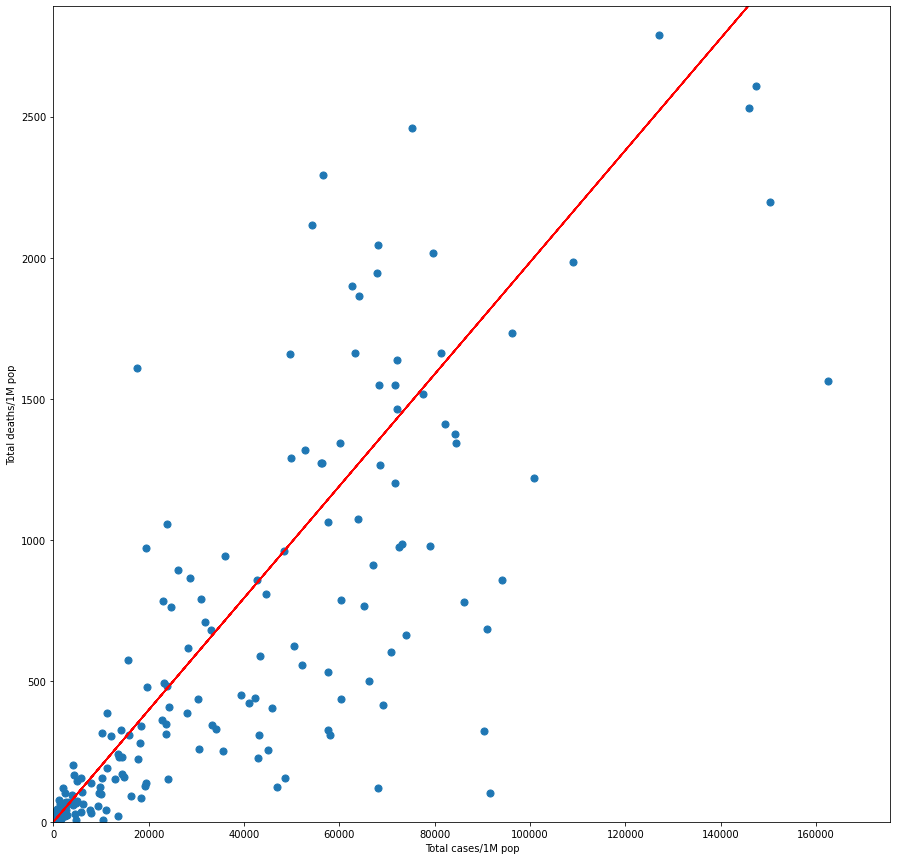

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

ax.scatter(x=data_df['Tot\xa0Cases/1M pop'],y=data_df['Deaths/1M pop'], s=50.0)
ax.set_xlabel('Total cases/1M pop')
ax.set_ylabel('Total deaths/1M pop')

x = data_df['Tot\xa0Cases/1M pop'] 
a = (data_df['Deaths/1M pop']/data_df['Tot\xa0Cases/1M pop']).mean()
y = x * a


plt.plot(x,y,'r')
plt.ylim(0,max(data_df['Deaths/1M pop']+100))
plt.xlim(0,max(data_df['Tot\xa0Cases/1M pop']+13000))
plt.show()

####**Nhận xét**
- Đường màu đỏ thể hiện mức độ tử vong trung bình so với tổng ca nhiễm trên 1 triệu dân  của các nước trên thế giới. 
- Các đất nước nằm phía dưới đường màu đỏ có hệ thống y tế tốt khi có tỉ lệ tử vong so với số ca nhiễm thấp hơn mức trung bình của thế giới. Đặc biêt, có một số nước ở Tây Á có số lượng người tử vong rất thấp so với trung bình của toàn thế giới ở cùng mức số lượng người nhiễm.
-> Điều đó chứng tỏ, các nước ở Tây Á có đội ngũ y bác sĩ rất tốt và cách điều trị hiệu quả khi dịch bệnh bùng phát.

### TotalCases vs TotalTests

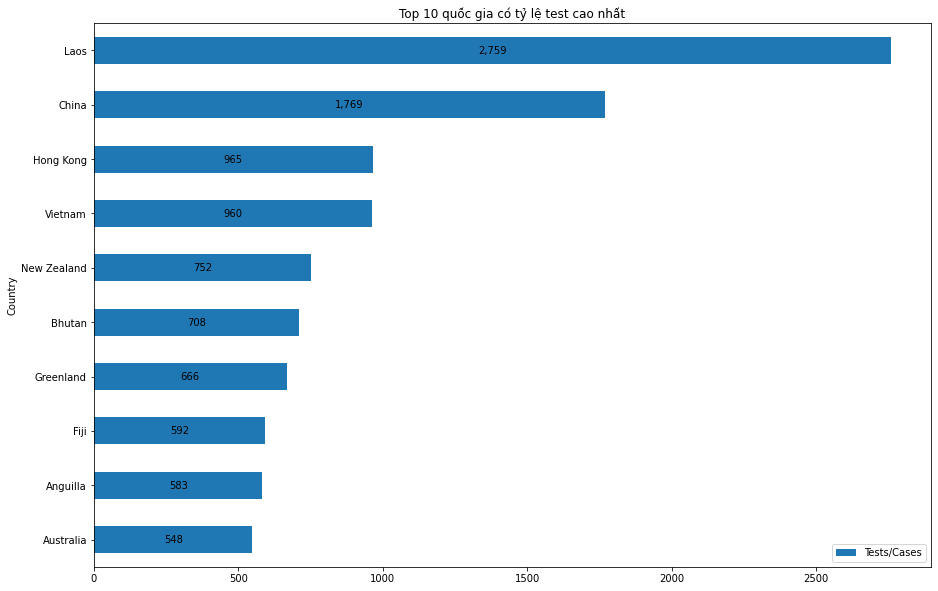

In [ ]:
df = data_df.copy()
df['Tests/Cases'] = df['TotalTests']/df['TotalCases']
top10_test = df.sort_values('Tests/Cases').dropna(subset=['Tests/Cases']).tail(10)

ax = top10_test.plot(kind='barh',x='Country,Other',y='Tests/Cases', figsize=(15,10))
plt.ylabel('Country')
plt.title('Top 10 quốc gia có tỷ lệ test cao nhất')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds  
    ax.annotate(format(int(width), ','), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')   
plt.show()

####**Nhận xét**
- Sử dụng biểu đồ bar chart dạng nằm ngang giúp so sánh tỉ lệ xét nghiệm trên tổng số ca nhiễm.
- Đây là top 10 quốc gia có tỉ lệ xét nghiệm cao nhất thế giới (tỉ lệ số xét nghiệm trên số ca nhiễm) => Đây là các nước tiêu biểu trong phòng chống dịch bệnh, chủ yếu là các nước châu Á, châu Úc. Việc áp dụng hay học hỏi mô hình chống dịch của những nước này có thể mang lại hiểu quả phòng dịch cao ở những nước, khu vực mà dịch bệnh đang bùng nổ mạnh mẽ.

### TotalDeaths, TotalRecovered, ActiveCases

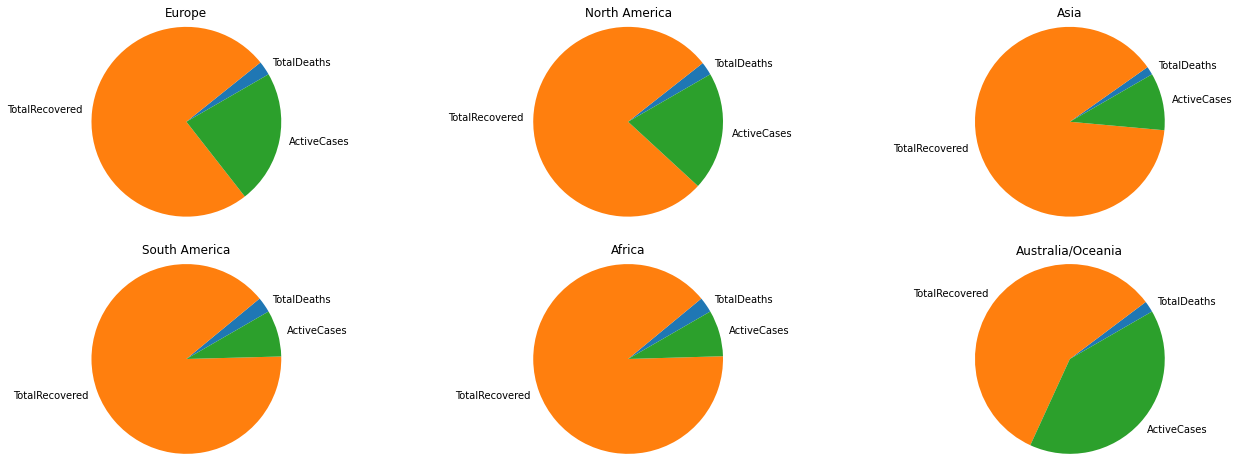

In [ ]:
df = data_df.groupby('Continent').sum().sort_values('TotalCases', ascending=False)[['TotalDeaths','TotalRecovered','ActiveCases']]
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
for i, (idx, row) in enumerate(df.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, radius=1.2)
    ax.set_title(idx)
fig.subplots_adjust(wspace=.9)

####**Nhận xét**
- Mỗi biểu đồ tròn trên thể hiện tỉ lệ số ca nhiễm, số ca đã tử vong và số ca đã chữa khỏi ở 1 khu vực cụ thể trên thế giới. 
- Ta nhận thấy rằng tỉ lệ số ca nhiễm ở các khu vực như châu Âu, Bắc Mĩ hay châu Úc đang ở mức cao. Việc chia ra từng biểu đồ tròn riêng biệt như trên giúp ta có thể đánh giá chính xác tình hình dịch bệnh ở từng khu vực cụ thể.

### TotalCases vs Population

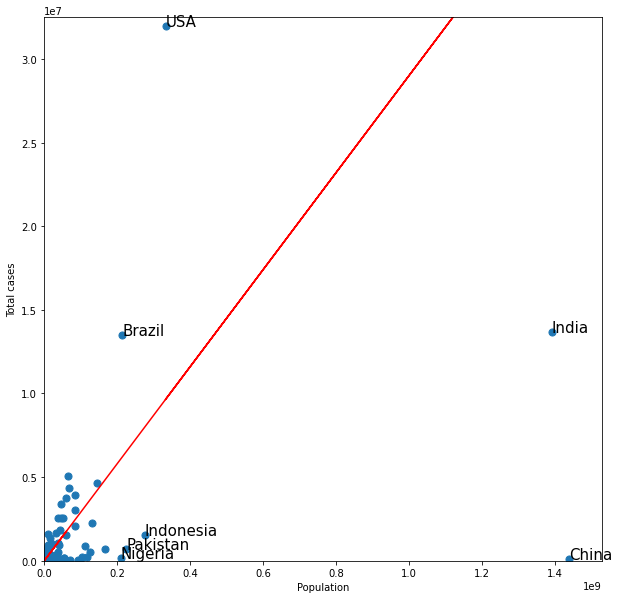

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x=data_df['Population'],y=data_df['TotalCases'], s=50.0)
ax.set_xlabel('Population')
ax.set_ylabel('Total cases')

x = data_df['Population'] 
a = (data_df['TotalCases']/data_df['Population']).mean()
y = x * a

for idx, row in data_df.iterrows():
  if abs((a * row['Population'] - row['TotalCases'])) / (math.sqrt(a * a + 1))>5500000:
    ax.annotate(row['Country,Other'], xy=(row['Population'], row['TotalCases']), size=15)

plt.plot(x,y,'r')
plt.ylim(0,max(data_df['TotalCases']+500000))
plt.xlim(0,max(data_df['Population']+90000000))
plt.show()

###**Nhận xét:**
- Đây là mối quan hệ giữa số ca nhiễm với dân số của các nước. 
- Ta hãy cùng nhau xem xét liệu với quy mô dân số vô cùng lớn của một số nước, dịch bệnh liệu có tăng nhanh và rất khó để kiểm soát hay không (tức là quy mô dân số càng lớn, dịch bệnh sẽ lây lan càng nhanh chóng hay không).
-  Đường màu đỏ thể hiện mức trung bình của thế giới về mối liên hệ này. Những nước nằm dưới và càng xa đường này là những nước có dân số lớn tuy nhiên đã có công tác chống dịch vô cùng hiểu quả.
->Vậy là quy mô dân số không phải là yếu tố quyết định và ảnh hưởng chính đến tình hình dịch bệnh ở các nước mà còn có các yếu tố quan trọng khác như là công tác phòng dịch, ý thức người dân, trình độ y tế, kinh tế,...

### TotalScases vs Serious,Critical

In [ ]:
df = data_df.copy()
df['SeriousRate'] = (df['Serious,Critical'] / df.TotalCases)**2

In [ ]:
df = df[['Country,Other', 'TotalCases', 'Serious,Critical', 'SeriousRate']].dropna(how='any');

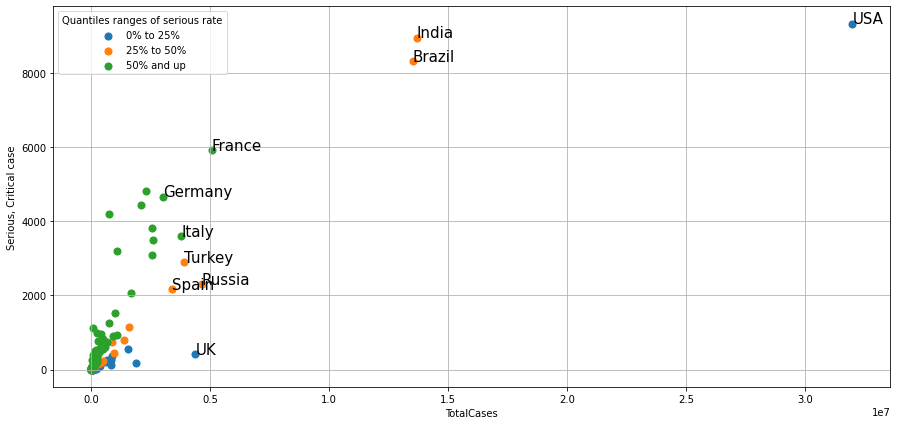

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

top_10_total = df.TotalCases.nlargest(10).values[-1]

df3 = df[df.SeriousRate <= df.SeriousRate.quantile(0.25)]
ax.scatter(x=df3['TotalCases'],y=df3['Serious,Critical'], s=50., label='0% to 25%')

df3 = df[(df.SeriousRate > df.SeriousRate.quantile(0.25)) & (df.SeriousRate <= df.SeriousRate.quantile(0.5))]
ax.scatter(x=df3['TotalCases'],y=df3['Serious,Critical'], s=50., label='25% to 50%')

df3 = df[(df.SeriousRate > df.SeriousRate.quantile(0.5))]
ax.scatter(x=df3['TotalCases'],y=df3['Serious,Critical'], s=50., label='50% and up')

for idx, row in df.iterrows():
    if row['TotalCases'] >= top_10_total:
        ax.annotate(row['Country,Other'], xy=(row['TotalCases'], row['Serious,Critical']), size=15)

ax.set_xlabel('TotalCases')
ax.set_ylabel('Serious, Critical case')

ax.legend(title='Quantiles ranges of serious rate')
ax.grid(True)
plt.show()

- Ở đây, ta xem xét tỉ lệ số ca nghiêm trọng với tổng số ca nhiễm của các nước. Chọn biểu đồ scatter để thể hiện được sự phân bố dữ liệu giữa các nước.
- Biểu đồ trên thể hiện được tỉ lệ các ca nghiêm trọng của các nước trên thế giới và tổng số ca nhiễm của nước đó. Ta có 3 mức độ được thể hiện ở biểu đồ trên là: tỉ lệ các ca nghiêm trọng ở mức thấp (< 25%), trung bình (25 -> 50%) và cao (trên 50%).
- Dựa theo biểu đồ trên, ta có thể đánh giá chính xác được tỉ lệ các ca nghiêm trọng ở các nước để có thể đánh giá được mức độ nghiêm trọng của dịch bệnh để có biện pháp ứng phó phù hợp (ta không thể chỉ nhìn vào số ca đang nguy kịch để để cho rằng quốc gia đó đang khủng hoảng trong việc điều trị cho bệnh nhân). Ví dụ như Mỹ, nước có số ca nguy kịch cao nhất hiện nay nhưng nếu xét về tỉ lệ thì mức ca nguy kịch của Mỹ chỉ ở mức thấp so với các nước khác; những nước nhỏ khác tuy có số ca nhiễm thấp nhưng biểu đồ trên lại cho thấy tỉ lệ các ca nguy kịch của nước họ đang ở mức cao,...
- Nhờ sự đánh giá này mà các nước có thể đánh giá được mức độ nghiêm trọng của dịch bệnh nước họ và có các biện pháp chữa trị phù hợp cho bệnh nhân cũng như kêu gọi sự giúp đỡ của các tổ chức trên thế giới.

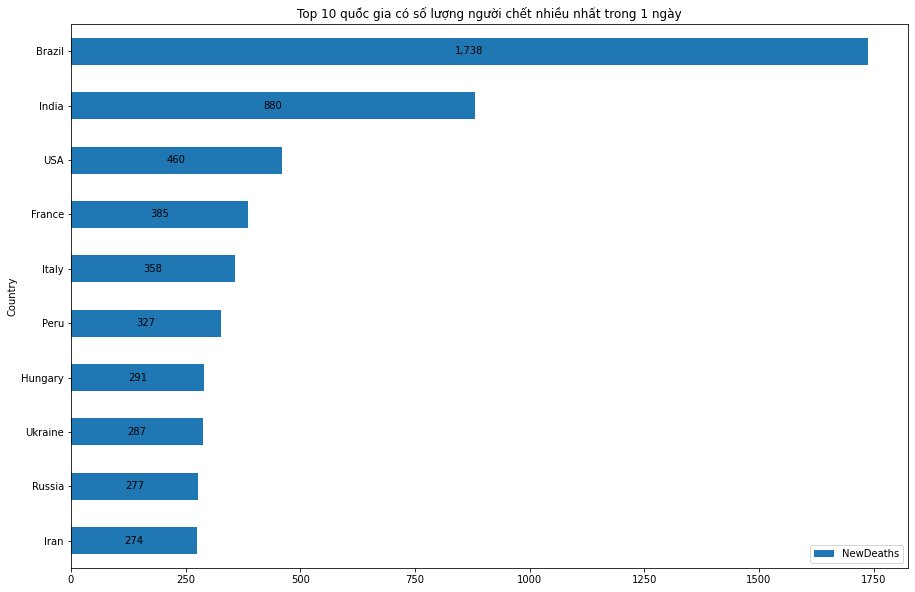

In [ ]:
top10_newcase = data_df.sort_values('NewDeaths').dropna(subset=['NewDeaths']).tail(10)
ax = top10_newcase.plot(kind='barh',x='Country,Other',y='NewDeaths', figsize=(15,10))
plt.ylabel('Country')
plt.title('Top 10 quốc gia có số lượng người chết nhiều nhất trong 1 ngày')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds  
    ax.annotate(format(int(width), ','), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')   
plt.show()

####**Nhận xét**
- Ta nhận thấy số lượng người đang mắc bệnh nặng có mối tương quan với số lượng ca tử vong trong ngày tiếp theo.
- Càng nhiều người mắc bệnh nặng thì số lượng tử vong trong ngày tiếp theo và các ngày tiếp sẽ càng nhiều.

### NewCases

In [ ]:
data_df.columns

Index(['time_data', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl'],
      dtype='object')

In [ ]:
newcase_contient_df = data_df.groupby('Continent').agg({'NewCases':'sum','NewDeaths':'sum'}).reset_index()
newcase_contient_df

,Continent,NewCases,NewDeaths
0,Africa,10252.0,264.0
1,Asia,303423.0,2247.0
2,Australia/Oceania,205.0,1.0
3,Europe,108923.0,2785.0
4,North America,71670.0,693.0
5,South America,93784.0,2813.0


#####**Nhận xét**
- Hai biểu đồ trên thể hiện tỉ lệ số ca nhiễm mới ở các khu vực trên thế giới. Quan sát thấy, dịch bệnh ở châu Á đang diễn biến hết sức phức tạp với số ca nhiễm mới rất nhiều và chiếm hơn 1/2 so với thế giới. 
- Biểu đồ trên cho ta cái nhìn tổng quan về tình hình dịch bệnh ở các khu vực trên thế giới để từ đó các chuyên gia có những phân tích về mức độ lây lan dịch ở từng khu vực cụ thể, để rồi các nước sớm biết được các nguy cơ của nước mình để chủ động phòng tránh trước.

####Top 10 new cases

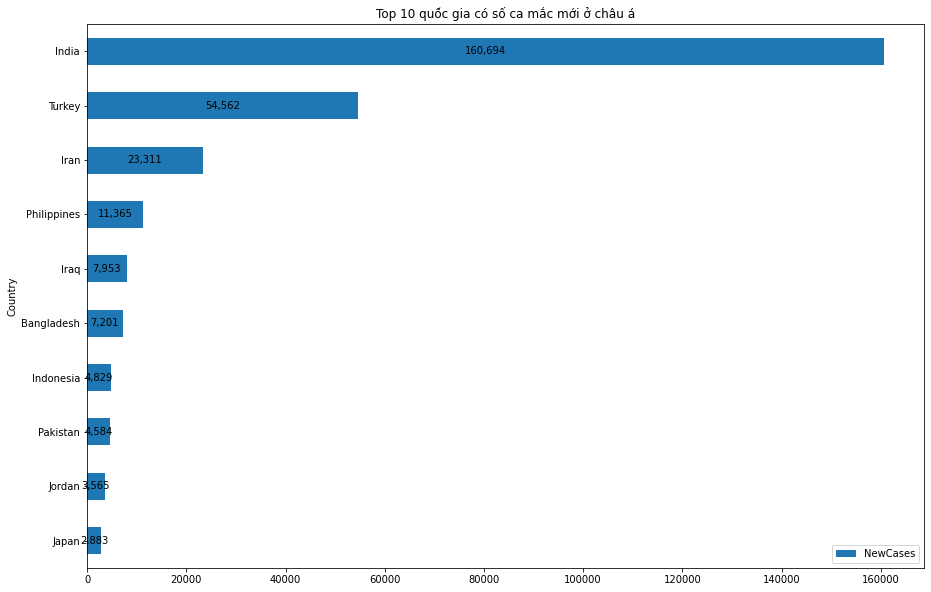

In [ ]:
df_asia = data_df.groupby('Continent').get_group('Asia')
top10_newcase = df_asia.sort_values('NewCases').dropna(subset=['NewCases']).tail(10)
ax = top10_newcase.plot(kind='barh',x='Country,Other',y='NewCases', figsize=(15,10))
plt.ylabel('Country')
plt.title('Top 10 quốc gia có số ca mắc mới ở châu á')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds  
    ax.annotate(format(int(width), ','), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')   
plt.show()

####**Nhận xét**
Ta hãy cùng phân tích tình hình dịch bệnh ở khu vực Châu Á hiện nay:
- Biểu đồ trên thể hiện số ca nhiễm mới của 10 nước Châu Á trong đã ngày qua. Ta nhận thấy Ấn độ và Thổ Nhĩ Kỳ là những nước có số lượng ca nhiễm mới tăng cao nhất khu vực.
->Nhận thấy, số ca nhiễm mới này hiện nay tăng đáng kể so với phần còn lại của thế giới, nguy cơ lây lan dịch bệnh rất lớn điều đó rất đáng báo động trong những ngày sắp tới.

## Phân tích tình hình dịch bệnh giữa các khu vực

In [ ]:
tsne = TSNE(n_components=2, perplexity=20, random_state=0)

In [ ]:
df = data_df.dropna()

In [ ]:
country_sr = df['Country,Other']
continent = df['Continent']
totalcases = df['TotalCases']

In [ ]:
train_df = df.loc[:, ((df.dtypes == float) | (df.dtypes == int))]

In [ ]:
trained_df = tsne.fit_transform(train_df)

In [ ]:
df = pd.DataFrame(data = trained_df, columns=['p1', 'p2'])

In [ ]:
country_sr = country_sr.reset_index(drop=True)
continent = continent.reset_index(drop=True)
total_case = totalcases.reset_index(drop=True)

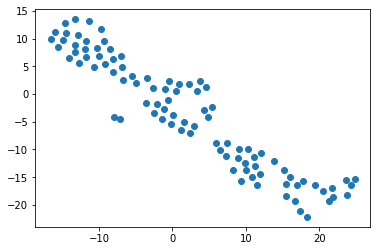

In [ ]:
plt.scatter(df.p1, df.p2)

In [ ]:
df['Country,Other'] = country_sr
df['Continent'] = continent
df['TotalCases'] = total_case

In [ ]:
df

,p1,p2,"Country,Other",Continent,TotalCases
0,17.353498,-21.047705,USA,North America,31990143
1,18.341774,-22.176378,India,Asia,13686073
2,24.831734,-15.369703,Brazil,South America,13521409
3,15.398442,-16.277330,France,Europe,5067216
4,16.681774,-19.292782,Russia,Europe,4649710
...,...,...,...,...,...
88,-16.596279,9.835041,Curaçao,North America,11385
89,-15.616834,8.395609,Guyana,South America,11189
90,-16.010012,11.225455,Bahamas,North America,9460
91,6.408278,-10.182606,Yemen,Asia,5446


In [ ]:
fig = px.scatter(df, x="p1", y="p2", color="Continent",
                 size="TotalCases", hover_data=['Country,Other'], size_max=50)
fig.show()

Nhận xét: 
 
Dựa theo 2 hình trên ta thấy được (2): 
- Nhóm các nước có số ca mắc cao có xu hướng tách rời nhóm có số ca mắc thấp.
 
- Giữa các châu lục, vùng lãnh thổ có tình hình dịch bệnh không khác biệt, điều đó có thể giúp ta cơ bản loại bỏ được giả thuyết virus được tạo ra để đánh vào một khu vực cụ thể nào đó.